In [2]:
import pandas as pd
import numpy as np

In [3]:
df_b = pd.read_csv("E:/idrani maam/boston_dataset.csv")

In [4]:
df_b.head()

,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [5]:
df_b.dtypes

Unnamed: 0      int64
crim          float64
zn            float64
indus         float64
chas            int64
nox           float64
rm            float64
age           float64
dis           float64
rad             int64
tax             int64
ptratio       float64
black         float64
lstat         float64
medv          float64
dtype: object

In [6]:
x = df_b.iloc[:,0:13]
y = df_b.iloc[:,13]

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from mlxtend.evaluate import bias_variance_decomp
from sklearn.metrics import r2_score

In [13]:
x_tr,x_test,y_tr,y_test = train_test_split(x,y,test_size=.2,random_state=100)

In [14]:
model_lm = LinearRegression()

In [15]:
mse,bias,variance = bias_variance_decomp(model_lm,x_tr.values,y_tr.values,x_test.values,y_test.values,loss="mse",num_rounds=200,random_seed=1)

In [16]:
print("mse",mse)
print("bias",bias)
print("variance",variance)

mse 22.96438562481002
bias 22.20619469904259
variance 0.7581909257674261


In [18]:
model_lm.fit(x_tr,y_tr)

LinearRegression()

In [24]:
p_tr = model_lm.predict(x_tr)

In [19]:
p_lm = model_lm.predict(x_test)

In [20]:
r2_score(y_test,p_lm)

0.6198464491263109

In [21]:
model_lm.coef_

array([-1.71525530e-03,  5.70771689e-02,  2.23811981e-02,  9.43358725e-02,
       -3.73849555e-01,  3.14742994e+00, -4.76119967e+00,  8.52075662e-02,
       -3.48156322e-02,  1.20247974e-01, -2.61184090e-03,  1.85111550e-01,
       -6.85578198e-03])

In [22]:
x_tr.columns

Index(['Unnamed: 0', 'crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis',
       'rad', 'tax', 'ptratio', 'black'],
      dtype='object')

In [23]:
import seaborn as sns
sns.barplot(x="features",y="coef",data=lm_coef)

NameError: name 'lm_coef' is not defined

#ridge regression model

In [25]:
from sklearn.linear_model import Ridge
model_ridge = Ridge(alpha=1.0)

In [26]:
mse,bias,variance = bias_variance_decomp(model_ridge,x_tr.values,y_tr.values,x_test.values,y_test.values,loss="mse",num_rounds=200,random_seed=1)

In [27]:
print("mse",mse)
print("bias",bias)
print("variance",variance)

mse 22.980790206610838
bias 22.2871108279322
variance 0.6936793786786345


In [29]:
model_ridge.fit(x_tr,y_tr)

Ridge()

In [30]:
p_ridge = model_ridge.predict(x_test)

In [31]:
r2_score(y_test,p_ridge)

0.618641149515923

In [34]:
ridge_coef=pd.DataFrame({"Features":x_tr.columns,"coef":model_ridge.coef_})
ridge_coef

,Features,coef
0,Unnamed: 0,-0.001673
1,crim,0.056799
2,zn,0.022022
3,indus,0.100886
4,chas,-0.326810
5,nox,1.774345
6,rm,-4.751377
7,age,0.086690
8,dis,-0.051833
9,rad,0.122039


<AxesSubplot:xlabel='Features', ylabel='coef'>

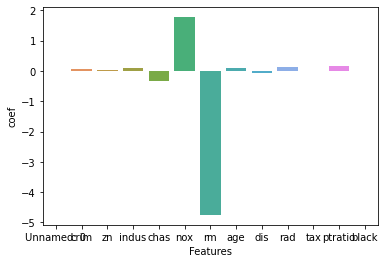

In [35]:
sns.barplot(x="Features",y="coef",data=ridge_coef)

In [ ]:
#Lasso Regression

In [36]:
from sklearn.linear_model import Lasso

In [37]:
model_lasso = Lasso(alpha=4.0)

In [38]:
mse,bias,variance = bias_variance_decomp(model_lasso,x_tr.values,y_tr.values,x_test.values,y_test.values,loss="mse",num_rounds=200,random_seed=1)

In [39]:
print("mse",mse)
print("bias",bias)
print("variance",variance)

mse 30.707198929525802
bias 30.315634388860243
variance 0.39156454066555824


In [40]:
model_lasso.fit(x_tr,y_tr)

Lasso(alpha=4.0)

In [41]:
p_lasso = model_lasso.predict(x_test)

In [42]:
r2_score(y_test,p_lasso)

0.4806068682143403

In [44]:
lasso_coef = pd.DataFrame({"Features":x_tr.columns,"coef":model_lasso.coef_})

In [45]:
lasso_coef

,Features,coef
0,Unnamed: 0,-0.003562
1,crim,0.025815
2,zn,-0.020006
3,indus,0.017759
4,chas,-0.000000
5,nox,0.000000
6,rm,-0.000000
7,age,0.088187
8,dis,-0.000000
9,rad,0.000000


<AxesSubplot:xlabel='Features', ylabel='coef'>

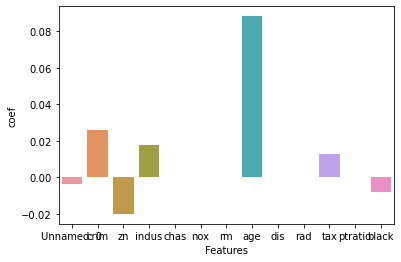

In [46]:
sns.barplot(x="Features",y="coef",data=lasso_coef)